In [8]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 


In [9]:
data_raj = pd.read_csv("RajMusicals.csv")

In [10]:
data_bajao = pd.read_csv("Bajaao Title.csv")

In [11]:
data_bajao["product_title"].head()

0    Faber Music Piano Adventures Lesson Book Prime...
1       Vox Pathfinder 10W Bass Stereo Combo Amplifier
2                              Boss BCB-60 Pedal Board
3    Schecter Damien Special FR Electric Guitar - C...
4            Vox Pathfinder 15R Guitar Combo Amplifier
Name: product_title, dtype: object

In [12]:
data_raj["Title"]

0       5 Core 5C WPA 116 BDH Portable Wireless Amplif...
1                           5-Piece Acoustic Drumkit Bags
2                           Ableton Push 2 + Live 10 Suit
3          Acoustic Foam Pyramid 1 Feet x 1 Feet x 2 Inch
4       Acoustic Foam Pyramid 1.5 Feet x 1.5 Feet x 2 ...
5          Acoustic Foam Pyramid 2 Feet x 2 Feet x 2 Inch
6          Acoustic Foam Pyramid 6 Feet x 3 Feet x 2 Inch
7            Acoustic Foam Wedge 1 Feet x 1 Feet x 2 Inch
8        Acoustic Foam Wedge 1.5 Feet x 1.5 Feet x 2 Inch
9            Acoustic Foam Wedge 2 Feet x 2 Feet x 2 Inch
10           Acoustic Foam Wedge 6 Feet x 3 Feet x 2 Inch
11      Acoustic Foam Wedge 6 Pieces Pack 1 Feet x 1 F...
12      Acoustic Foam Wedge 6 Pieces Pack 2 Feet x 2 F...
13            Adam Audio A5X Active Studio Monitor (Pair)
14          ADAM Audio A5X Active Studio Monitor (Single)
15                  Adam Audio A77X Active Studio Monitor
16            Adam Audio A7X Active Studio Monitor (Pair)
17          Ad

In [13]:
text_base = data_bajao["product_title"].tolist()
text = "".join(text_base)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)

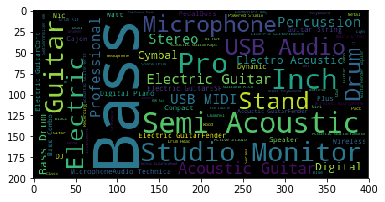

In [14]:
text_var = data_raj["Title"].tolist()
text = "".join(text_var)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)

### Machine Learnign way

Logic: If the word with lesser tf-idf matches the word means the same

In [15]:
vectorizer = TfidfVectorizer()
corpus = text_base
X = vectorizer.fit_transform(corpus)

In [16]:
print(len(vectorizer.get_feature_names()))

26345


In [17]:
split_it = "".join(corpus).split() 

counter = Counter(split_it) 

most_occur = counter.most_common(50) 

print(most_occur) 

[('-', 9829), ('Guitar', 8110), ('Electric', 4916), ('Acoustic', 3255), ('Bass', 2387), ('with', 1941), ('Series', 1604), ('Drum', 1538), ('Open', 1480), ('Microphone', 1066), ('Electro', 986), ('Condenser', 980), ('Standard', 940), ('Audio', 917), ('and', 911), ('Dreadnought', 898), ('Pro', 853), ('Cutaway', 830), ('Studio', 794), ('Black', 786), ('Digital', 785), ('for', 747), ('&', 732), ('Keyboard', 729), ('Effects', 699), ('Set', 682), ('Benton', 645), ('USB', 644), ('Wireless', 611), ('of', 602), ('Active', 600), ('Natural', 576), ('Custom', 568), ('Vintage', 565), ('String', 557), ('Box', 551), ('Maple', 545), ('Power', 543), ('Pack', 527), ('With', 521), ('Cable', 510), ('Professional', 507), ('Deluxe', 500), ('Stratocaster', 498), ('Cymbal', 491), ('B', 485), ('6', 475), ('American', 452), ('2', 448), ('Crash', 442)]


In [18]:
print(len(vectorizer.get_feature_names()))

26345


In [19]:
vectorizer = TfidfVectorizer()
corpus = text_var
X = vectorizer.fit_transform(corpus)

In [20]:
print(len(vectorizer.get_feature_names()))

4915


In [21]:
split_it = "".join(corpus).split() 
counter = Counter(split_it) 
most_occur = counter.most_common(50) 
print(most_occur) 

[('Guitar', 328), ('Electric', 308), ('Acoustic', 277), ('Drum', 204), ('With', 197), ('Bass', 197), ('Studio', 158), ('Audio', 135), ('Wireless', 130), ('Microphone', 126), ('Digital', 116), ('Condenser', 111), ('USB', 108), ('Keyboard', 98), ('Monitor', 90), ('Semi', 86), ('-', 81), ('Set', 66), ('Active', 66), ('GuitarFender', 65), ('Cymbal', 64), ('Percussion', 64), ('Powered', 62), ('Vocal', 62), ('Pro', 60), ('Stand', 57), ('Portable', 56), ('Instrument', 54), ('MicrophoneSennheiser', 53), ('Midi', 52), ('GuitarCort', 51), ('Combo', 50), ('and', 49), ('PA', 48), ('Dynamic', 47), ('GuitarYamaha', 47), ('Cajon', 45), ('Electronic', 44), ('Professional', 43), ('Stereo', 42), ('2', 42), ('GuitarIbanez', 41), ('5', 40), ('Violin', 40), ('Snare', 40), ('PedalBoss', 40), ('Standard', 39), ('GuitarESP', 39), ('Series', 39), ('Wood', 38)]


In [22]:
import re

In [23]:
bool(re.search('Microphone', 'MicrophoneSennheiser'))

True

In [24]:
e

In [25]:
len(text_base)

39488

In [26]:
len(text_var)

3941

### Build inverted index

### Brute force v1

Add score 1 if the word exists in the opposite database

In [45]:
import time


score = {}
start = time.time()
sum_time = []
for index_base,base in enumerate(text_base[0:1]):
    score[index_base] = {}
    #split the base title into words
    split_words = base.split()
    #loop through all non standard titles
    for index_ns,ns in enumerate(text_var[0:1]):
        score[index_base][index_ns] = 0
        print(len(split_words))
        for w in split_words:
            #If the word exists in the non-standard title
            try:
                
                if bool(re.search(w, ns)):
                    score[index_base][index_ns] += 1
                
                #print(end - start)
            except:
                continue
            #sum_time.append(end-start)
end = time.time()
print(end-start)
#print((sum(sum_time)/len(sum_time)))

8
0.00029277801513671875


In [65]:
3941 * 39488 * 6 * (3 * 10**-5)/60/60

7.781110400000001

In [42]:
average_time_per_search = 3 * 10**-5

In [43]:
average_time_per_search * len(text_var) * len(text_base)

4668.6662400000005

In [46]:
8 * average_time_per_search

0.00024000000000000003

In [34]:
len(text_base)

39488

In [37]:
39488

2.161388888888889

### Inverted Index

In [48]:
#converting standard set to a list of words and getting all unqiue words in the standard set
word_list = {}
all_unique_words = []
idf_word =  {}
for index_base, base in enumerate(text_base):
    split_words = base.split()
    word_list[index_base] = split_words
    all_unique_words += split_words        
all_unique_words = list(set(all_unique_words))

In [105]:
idf_word = {}
for doc in word_list:
    doc_dict = {}
    for word in word_list[doc]:
        doc_dict[word] = 1
    for word in doc_dict:
        if word in idf_word:
            idf_word[word] += 1
        else:
            idf_word[word] = 1

In [102]:
N = len(text_base)
for word in idf_word:
    idf_word[word] = N/idf_word[word]

In [107]:
print(N)

39488


In [106]:
idf_word["Fender"]

1967

In [54]:
def avg(x):
    return (sum(x)/len(x))

In [61]:
all_time = []
start = time.time()
#converting all the non-standard list to inverted index of unqiue words in standard
ns_word_list = {}
for word in all_unique_words:
    ns_word_list[word] = []
    for index_ns,ns in enumerate(text_var):
        if word in ns:
            ns_word_list[word].append(index_ns)
end = time.time()
print(end-start)
#print(avg(all_time))

16.860002756118774


In [57]:
3 * 10**-6 *len(all_unique_words) * len(text_var)

413.533071

In [58]:
413/60

6.883333333333334

In [68]:
ns_word_list["Fender"]

[609,
 610,
 1143,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1195,
 1196,
 1197,
 1198,
 1199,
 1200,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1219,
 1220,
 1221,
 1222,
 1223,
 1224,
 1225,
 1226,
 1227,
 1228,
 1229,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237,
 1238,
 1239,
 1240,
 1241,
 1242,
 1243,
 1244,
 1245,
 1246,
 1247,
 1248,
 1249,
 1250]

In [79]:
score = {}
for key in word_list:
    score[key] = {}
    for word in word_list[key]:
        ns_indexes = ns_word_list[word]
        for ns_index in ns_indexes:
            if ns_index in score[key]:
                score[key][ns_index] += 1
            else:
                score[key][ns_index] = 0 

In [85]:
score[1]

{0: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 70: 0,
 161: 0,
 163: 0,
 164: 0,
 190: 0,
 197: 1,
 198: 1,
 199: 1,
 200: 2,
 201: 1,
 202: 0,
 203: 1,
 204: 1,
 205: 0,
 206: 0,
 207: 0,
 208: 0,
 209: 0,
 210: 0,
 211: 0,
 229: 0,
 231: 0,
 234: 0,
 249: 0,
 251: 0,
 292: 0,
 293: 0,
 338: 0,
 384: 0,
 408: 0,
 409: 0,
 421: 0,
 425: 0,
 439: 0,
 444: 0,
 445: 0,
 448: 1,
 472: 0,
 475: 0,
 477: 1,
 478: 0,
 484: 0,
 489: 0,
 502: 1,
 503: 0,
 504: 0,
 505: 1,
 507: 0,
 558: 1,
 559: 0,
 560: 0,
 561: 0,
 562: 2,
 564: 0,
 566: 0,
 567: 1,
 568: 1,
 569: 2,
 570: 2,
 571: 1,
 572: 0,
 573: 0,
 575: 0,
 576: 0,
 577: 2,
 578: 2,
 590: 0,
 591: 0,
 596: 0,
 609: 0,
 618: 0,
 623: 0,
 624: 0,
 625: 0,
 626: 0,
 627: 0,
 628: 0,
 629: 0,
 630: 0,
 633: 0,
 639: 0,
 680: 1,
 688: 0,
 689: 1,
 695: 0,
 696: 0,
 697: 0,
 698: 0,
 773: 0,
 781: 0,
 784: 0,
 785: 0,
 786: 0,
 787: 0,
 788: 0,
 789: 0,
 790: 0,
 791: 0,
 799: 0,
 800: 0,
 801: 0,
 802: 0,
 838: 0,
 839: 0,
 840: 0,
 

In [88]:
text_var[200]

'Ampeg BA-115V2 Bass Combo Amplifier'

In [86]:
text_base[1]

'Vox Pathfinder 10W Bass Stereo Combo Amplifier'

In [92]:
valid_score = {}
for key in score:
    for ns_index in score[key]:
        if score[key][ns_index] > 3:
            if key in valid_score:
                valid_score[key].append(ns_index)
            else:
                valid_score[key] = []

In [93]:
len(valid_score)

7740

In [94]:
valid_score.keys()

dict_keys([16384, 16385, 32770, 3, 4, 32773, 32774, 16391, 16392, 16393, 32778, 16395, 16396, 13, 16398, 39281, 17, 16387, 20, 21, 22, 16407, 25, 26, 32795, 28, 16414, 16415, 32800, 16417, 16418, 32804, 32805, 32806, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 16434, 51, 16436, 16437, 54, 16439, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 78, 16397, 80, 81, 37101, 87, 89, 93, 95, 37647, 97, 99, 16486, 16487, 16488, 16489, 16491, 16492, 16493, 35517, 123, 124, 37648, 133, 134, 135, 14840, 137, 16523, 16525, 16527, 16528, 147, 150, 153, 155, 32794, 160, 16547, 166, 32796, 36008, 16557, 16558, 178, 32798, 16568, 185, 24607, 189, 16575, 192, 32801, 19148, 202, 203, 204, 205, 206, 37888, 211, 218, 16603, 221, 16606, 224, 225, 226, 231, 232, 233, 16618, 32807, 35538, 16424, 35539, 16628, 16425, 248, 250, 251, 255, 256, 258, 16427, 16646, 16647, 16428, 267, 38274, 16429, 272, 274, 37653, 278, 16668, 16669, 16670, 16671, 16672, 16673, 16674, 16675, 293, 32817, 298, 3281

[131]

In [98]:
key = 16384
for key in valid_score:
    print(text_base[key])
    print("Matching words")
    for w in valid_score[key]:
        print(text_var[w])
    print(100*"*")

Alesis Elevate 6 Premium Active Studio Monitor
Matching words
Alesis Elevate 6 Passive Studio Monitor (Single)
****************************************************************************************************
ESP Ltd Viper-50 Electric Guitar - 2 Tone Sunburst
Matching words
ESP EC-1000 Amber Sunburst Electric Guitar
ESP EC-256 Black Electric Guitar
ESP EC-256 Snow White Electric Guitar
ESP EC-256FM Cobalt Blue Electric Guitar
ESP EC-256FM Dark Brown Sunburst Electric Guitar
ESP EC-256FM See Thru Purple Sunburst Electric Guitar
ESP GH-200 Black Electric Guitar
ESP LTD Viper-50 Electric Guitar - 2 Tone Burst
ESP MAX-200 RPR Electric Guitar
ESP SN-200FR Charcoal Metallic Electric Guitar
ESP SN-200FR Metallic Silver Electric Guitar
ESP Viper-50 Electric Guitar
****************************************************************************************************
Vault LP1MN Les Paul Style Electric Guitar With Digitech Element XP ELMTXPV-01 Guitar Processor Bundle with Amplifier, Tuner, Cab

Fender Squire Affinity Fat Strat Electric Guitar
****************************************************************************************************
Laney LX10 10W Guitar Combo Amplifier - Red
Matching words
****************************************************************************************************
Mapex BF1000 Falcon Double Braced 3 Tier Boom Stand - Chrome
Matching words
Mapex BF1000 Falcon Double Braced 3-Tier Boom Stand
Pearl BC830 Double Braced Boom Cymbal Stand
****************************************************************************************************
Roland HP101 Dark Rosewood Digital Piano With Stand
Matching words
****************************************************************************************************
Hohner M560066 Special 20 Harmonica - Key F
Matching words
Hohner Special 20 Harmonica Progressive Key D M560036X
Hohner Special 20 Harmonica Progressive Key-G M560086X
Hohner Special 20 Progressive Harmonica Key C M560016x
*************************

PRS SE AX20E Angelus Cutaway Electro-Acoustic Guitar
Rode VideoMicro On-Camera Microphone - Open Box
Roksak B-G20-PL-LT Bass Guitar Bag
Roksak E-G20-PL-LT Electric Guitar Bag
Roksak W-G20-PL-LT Acoustic Guitar Bag
Roland AC-33 Acoustic Chorus Guitar Amplifier
Roland AC-40 Acoustic Chorus Guitar Amplifier
Roland AC-60 RW Acoustic Chorus Guitar Amplifier
Roland CUBE-10GX Guitar Amplifier
Roland CUBE-40GX Guitar Amplifier
Roland CUBE-80GX Guitar Amplifier
Roland GR-55 GK BK Guitar Synthesizer
Roland Octapad SPD-20X Black Digital Percussion Pad
Roland OCTAPAD SPD-30 Version 2 Digital Percussion Pad (Black)
Roto Sound String Set JK-11 Acoustic Guitar
Samson RH600 Headphone - Open Box
Schecter Banshee-6 Extreme BCHB Electric Guitar
Schecter Banshee-6 SGR Electric Guitar
Schecter C-4 SGR BLK Electric Bass Guitar
Schecter Omen Extreme-6 BCH Electric Guitar
Schecter Omen Extreme-6 FR STBLK Electric Guitar
Schecter Omen Extreme-6 STBLK Electric Guitar
Schecter SGR C-4 Bass Guitar
Schecter SGR C-

Carlsbro CSD500 8-Piece Electronic Mesh Head Drum Kit
****************************************************************************************************
Vault ED-10C 41 inch Cutaway Acoustic Guitar - Open Box
Matching words
Kaps SPR-41S Cutaway Acoustic Guitar
****************************************************************************************************
Primacoustic London 8 Acoustic Treatment Room Kit for Rooms
Matching words
****************************************************************************************************
Ibanez Gary Willis Signature Electric 5 String Bass Guitar -Flat Black \(Fretted)
Matching words
Ibanez GSR205 5-String Bass Guitar
Ibanez SR405EQM-DEB Electric Bass Guitar
****************************************************************************************************
Breedlove Discovery Concert CE Sitka Spruce Acoustic Electric Guitar
Matching words
Breedlove DSC21CE Discovery Concert CE Mahogany Electro-Acoustic Guitar
Breedlove DSC21CES Discovery C

Granada GD-100CEQ Dreadnought Cutaway Semi Acoustic Guitar
Granada GS-100 Grand Symphony Acoustic Guitar - Natural
Granada PRG-118CEQ Cutaway Semi Acoustic Guitar
Granada PRLD-68Pro Dreadnought Cutaway Acoustic Guitar
Granada PRS-1 Pro Cutaway Medium Acoustic Guitar
Gretsch G2622 Streamliner Center Block Double-Cutaway Electric Guitar
Havana AG-34 Baby Acoustic Guitar
Hertz HZA-4503CE Electro-Acoustic Bass Guitar
Ibanez GRG170DXL-BKN Lefthanded Electric Guitar
Ibanez GRX70QA-TBB Electric Guitar
Ibanez GRX70QA-TRB Electric Guitar
Ibanez GSR200 4-Strings Bass Guitar
Ibanez GSR205 5-String Bass Guitar
Ibanez MD39C Cutaway Acoustic Guitar
Ibanez SA160FM LH-BBT Lefthanded Electric Guitar
Ibanez SR405EQM-DEB Electric Bass Guitar
Kaps SAP-41GB Solid Acoustic Guitar
Kaps SPR-41G Cutaway Acoustic Guitar
Kaps SPR-41S Cutaway Acoustic Guitar
Kaps ST-1000C Cutaway Acoustic Guitar
Kaps ST-1CB Acoustic Guitar
Kaps ST-1CR Cutaway Acoustic Guitar
Kaps ST-1J Baby Acoustic Guitar
Konig and Meyer Heli 2 

****************************************************************************************************
Dean Markley 2503C NickelSteel 7-String Electric Guitar Strings - 10-56
Matching words
****************************************************************************************************
BC Rich Bronze Warlock BLK Electric Guitar
Matching words
****************************************************************************************************
BC Rich JR V Electric Guitar
Matching words
****************************************************************************************************
Dean Markley 2504C NickelSteel 7-string Electric Guitar Strings Light Top Heavy Bottom - 10-60
Matching words
Dean Markley Blue Steel Electric Guitar Strings
Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
****************************************************************************************************
Dean Markley 2558 Blue Steel 6-string Electric Guita

Breedlove PUC11E Pursuit Concert E Electro-Acoustic Guitar
Breedlove PUC31CE Pursuit Concert CE Electro-Acoustic Guitar
Cort AD890CF Electro-Acoustic Guitar
Cort AD890MBCF Electro-Acoustic Guitar
Epiphone AJ-210CE Electro-Acoustic Guitar With Case
Farida F8CE Electro-Acoustic Guitar
Fender CC-60S Acoustic Guitar
Fender CC-60SCE Acoustic-Electric Guitar
Fender CD-110CE Semi Acoustic Guitar
Fender CD-140SCE All Mahogany Semi Acoustic Guitar With Case
Fender CD-140SCE Semi Acoustic Guitar
Fender CD-60 Dread V3 DS Acoustic Guitar - Walnut Fretboard
Fender CD-60 Dreadnought Acoustic Guitar
Fender CD-60 Mahogany Acoustic Guitar
Fender CD-60S All Mahogany Acoustic Guitar
Fender CD-60S Dreadnought Acoustic Guitar
Fender CD-60SCE All-Mahogany Electro Acoustic Guitar
Fender CD-60SCE Semi Acoustic Guitar
Fender CF-140S Folk Acoustic Guitar
Fender CP-60S Parlor Acoustic Guitar
Fender CT-60S Acoustic Guitar
Fender FA-115 Dreadnought Acoustic Guitar Pack
Fender FA-125 Dreadnought Acoustic Guitar
Fen

Fender American Deluxe Stratocaster HSS Electric Guitar
Fender Player Stratocaster HSS Electric Guitar - Mapel Fretboard
Fender Player Stratocaster HSS Electric Guitar - Pau Ferro Fretboard
Fender Squier Affinity Fat Stratocaster Electric Guitar
Fender Squier Affinity Stratocaster HSS LRL MBK Electric Guitar
Fender Squier Affinity Stratocaster HSS LRL OWT Electric Guitar
Fender Squier Affinity Stratocaster HSS RW OWT
Fender Squier Affinity Stratocaster HSS RW SLS
Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Fender Squier Bullet Stratocaster With Tremolo HSS
Fender Squier Bullet Stratocaster With Tremolo HSS Electric Guitar
Fender Squier Bullet Telecaster Indian Laurel Fingerboard Electric Guitar
Fender Squier Classic Vibe Stratocaster 60s Electric Guitar
Fender Squier MM Stratocaster Electric Guitar
Fender Squier Standard Fat Stratocaster Special Edition Electric Guitar
Fender Squier Standard Stratocaster FMT Electric Guitar
Fender Squier Stratocaster Electric Guitar

Fender CC-60S Acoustic Guitar
Fender CC-60SCE Acoustic-Electric Guitar
Fender CD-110CE Semi Acoustic Guitar
Fender CD-140SCE All Mahogany Semi Acoustic Guitar With Case
Fender CD-140SCE Semi Acoustic Guitar
Fender CD-60 Dread V3 DS Acoustic Guitar - Walnut Fretboard
Fender CD-60 Dreadnought Acoustic Guitar
Fender CD-60 Mahogany Acoustic Guitar
Fender CD-60S All Mahogany Acoustic Guitar
Fender CD-60S Dreadnought Acoustic Guitar
Fender CD-60SCE All-Mahogany Electro Acoustic Guitar
Fender CD-60SCE Semi Acoustic Guitar
Fender CF-140S Folk Acoustic Guitar
Fender CP-60S Parlor Acoustic Guitar
Fender CT-60S Acoustic Guitar
Fender FA-115 Dreadnought Acoustic Guitar Pack
Fender FA-125 Dreadnought Acoustic Guitar
Fender FA-125CE Dreadnought Electro-Acoustic Guitar
Fender FA-135CE Concert V2 AM WN Electro Acoustic Guitar
Fender FA-235E 2019 Limited Edition Striped Ebony Top Electro Acoustic Guitar
Fender FA-235E Concert Electro-Acoustic Guitar
Fender FA-345CE Auditorium Electro-Acoustic Guitar
Fe

Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
Ernie Ball 2223 Super Slinky Nickel Wound Electric Guitar Strings 9-42 Guage
****************************************************************************************************
SIT Strings S1052 Heavy Bottom Power Wound Nickel Electric Guitar Strings
Matching words
D'Addario EXL110BT Nickel Wound Electric Guitar Strings
D'Addario EXL115BT Nickel Wound Electric Guitar Strings
D'Addario EXL120BT Nickel Wound Electric Guitar Strings
D'Addario EXL125 Nickel Wound Electric Strings
DAddario EXL120 Nickel Wound, Super Light, 09-42 Electric Guitar Strings
Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
Ernie Ball 2223 Super Slinky Nickel Wound Electric Guitar Strings 9-42 Guage
****************************************************************************************************
ESP LTD AP-204 4-String Electric Bass Guitar - Jatoba Fretboard
Matching wo

Cort X-4 BK Electric Guitar
Cort X100 OPBB 6-String Electric Guitar
Cort X100 OPKB 6-String Electric Guitar
Cort X11QM-GRB 6 String Electric Guitar
Cort X11QM-WRB 6 String Electric Guitar
Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
Ernie Ball 2223 Super Slinky Nickel Wound Electric Guitar Strings 9-42 Guage
Ernie Ball Hybrid Slinky Nickel Wound Electric Guitar String 9-46 Gauge
Ernie Ball Regular Slinky Nickel Wound Electric Guitar String 10-46 Guage
ESP ARROW-401 Black Electric Guitar
ESP BK-600 Military Green Sunburst Satin Electric Guitar
ESP EC-10 Black Electric Guitar
ESP EC-256 Black Electric Guitar
ESP EC-256FM Cobalt Blue Electric Guitar
ESP EC-256FM Dark Brown Sunburst Electric Guitar
ESP F-10 Black Electric Guitar
ESP GH-200 Black Electric Guitar
ESP LTD AX-50 BLKS Electric Guitar
ESP LTD B-10 Electric Bass Guitar
ESP LTD B-15 5-String Electric Bass Guitar
ESP LTD B-204SM See Thru Black Satin Bass Guitar
ESP LTD EC-1000 Ever

Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Fender Squier Bullet Telecaster Indian Laurel Fingerboard Electric Guitar
Fender Squier Classic Vibe Jazz Bass 4-String Bass Guitar
Fender Squier Deluxe Dimension Bass 5 String Bass Guitar
Fender Squier Deluxe Dimension Bass V Bass Guitar
Fender Squier Deluxe Jazz Bass Active Bass Guitar
Fender Squier Jazz Bass Vintage Modified RW Bass Guitar
Fender Squire Affinity Jazz Bass Guitar
Fender Squire Affinity Precision Bass PJ Bass Guitar
Fender Squire Affinity Telecaster Indian Laurel Fingerboard Electric Guitar
Fender Vintage Modified Jazz Bass '77 Bass Guitar
Ibanez GSR200 4-Strings Bass Guitar
Music Man Caprice Bass 4-String Bass Guitar
****************************************************************************************************
DrumCraft CS-800 Heavy Duty Cymbal Stand
Matching words
****************************************************************************************************
DrumCraft DPD-800V4 Drum Pedal, He

Roland FP-10BKL Digital Piano
Roland G-5 VG Stratocaster Electric Guitar
Roland GR-55 GK BK Guitar Synthesizer
Roland GR-D V-Guitar Distortion Pedal
Roland MOBILE BA Battery-Powered Stereo Amplifier
Roland Mobile UA-M10 USB Audio Interface
Roland Octapad SPD-20X Black Digital Percussion Pad
Roland OCTAPAD SPD-30 Version 2 Digital Percussion Pad (Black)
Roland PSB-230EU AC Adaptor
Roland RH-A7BK Headphone
Roland RT-10K Acoustic Drum Trigger
Roland RT-10S Acoustic Drum Trigger
Roland RT-30H Acoustic Drum Trigger
Roland RT-30HR Acoustic Drum Trigger
Roland RT-30K Acoustic Drum Trigger
Roland TB-03 Bass Line
Roto Sound String Set JK-11 Acoustic Guitar
Samson BL3 Ultra-Light Boom Stand
Samson BL3VP Boom Stand & Cable 3-Pack
Samson CL-5B Handheld Condenser Microphone
Samson MK10 - Lightweight Boom Stand
Samson RH600 Headphone - Open Box
Schecter Banshee-6 Extreme BCHB Electric Guitar
Schecter Banshee-6 SGR Electric Guitar
Schecter C-4 SGR BLK Electric Bass Guitar
Schecter Omen Extreme-6 BCH 

Vox VX50AG 50-Watt Acoustic Guitar Amplifier
Yamaha APX600 Electro-Acoustic Guitar
Yamaha CPX600 Electro-Acoustic Guitar
Yamaha FGX800C Natural Electro-Acoustic Guitar
Yamaha FJX720SC Electro-Acoustic Guitar
Yamaha FS-TA TransAcoustic Guitar
Yamaha PSR-I455 Portable Keyboard - Open Box
Zildjian ZBT18CH 18-inch China Cymbal
Zoom A3 Pre-Amp & Effects for Acoustic Guitar
Zoom AC-2 Acoustic Creator - Direct Box
Zoom AC-3 Acoustic Creator - Enhanced Direct Box
Zoom MS-100BT Multistomp Guitar Pedal
Zoom Q3 Handy Video Recorder - Open Box
****************************************************************************************************
Fender FA-125 Dreadnought Acoustic Guitar - Sunburst - Open Box B Stock - 339198
Matching words
Alice A206 - 11-52 Acoustic Guitar strings
Aria AD-18C Cutaway Acoustic Guitar
Aria AD-20C Cutway Acoustic Guitar
Aria AWN-15CE Semi Acoustic Guitar
Aria IGB-STD Bass Guitar
Aria STB-PB Bass Guitar
Ashton D10C 39-Inch Cutaway Acoustic Guitar
Ashton D10CEQ 39-Inch S

Boss VE-8 Acoustic Singer
Breedlove DSC21CE Discovery Concert CE Electro-Acoustic Guitar
Breedlove DSC21CE Discovery Concert CE Mahogany Electro-Acoustic Guitar
Breedlove DSC21CES Discovery Concert CE Sunburst Electro-Acoustic Guitar
Breedlove DSD21CE Discovery Dreadnought CE Electro-Acoustic Guitar
Breedlove PUC11E Pursuit Concert E Electro-Acoustic Guitar
Breedlove PUC31CE Pursuit Concert CE Electro-Acoustic Guitar
Casio CTK6300IN Indian Keyboard - Open Box
Casio CTK7300IN Keyboard - Open Box
Casio MA-150 Mini Keyboard With Adapter and Free Stationery Box
Casio SA-46 Mini Keyboard With Free Stationary Box
Casio SA-47 Mini Keyboard With Free Stationary Box
Casio SA-76 Mini Keyboard WIth Adapter and Free Stationary Box
Casio SA-77 Mini Keyboard With Adapter and Free Stationary Box
Casio SA-78 Mini Keyboard With Adapter and Free Stationary Box
Clevan CX-52 FR BK Electric Guitar
Cort AD-810 Acoustic Guitar
Cort AD890CF Electro-Acoustic Guitar
Cort AD890MBCF Electro-Acoustic Guitar
Cort B

Kaps SAP-41G Acoustic Guitar
Kaps SAP-41GB Solid Acoustic Guitar
Kaps SAP-41GEQ Electro-Acoustic Guitar
Kaps SAP-41SEQ Electro-Acoustic Guitar
Kaps SPR-41G Cutaway Acoustic Guitar
Kaps SPR-41S Cutaway Acoustic Guitar
Kaps SPR-41SEQ Semi Acoustic Guitar
Kaps ST-1000C Cutaway Acoustic Guitar
Kaps ST-1000CEQ4 Semi Acoustic Guitar
Kaps ST-1000CT Semi Acoustic Guitar
Kaps ST-100C Acoustic Guitar
Kaps ST-10AC Acoustic Guitar
Kaps ST-10C Acoustic Guitar
Kaps ST-1CB Acoustic Guitar
Kaps ST-1CM Acoustic Guitar
Kaps ST-1CR Cutaway Acoustic Guitar
Kaps ST-1J Baby Acoustic Guitar
Kaps ST-PRO1000C Acoustic Guitar
Kaps ST-PRO1000CEM Semi Acoustic Guitar
Kaps ST-PRO1000CM Acoustic Guitar
KAPS ST-UK Black Ukulele
Konig and Meyer 17595 Ukulele-Violin Stand 17595-000-55 Black
Konig and Meyer Clarinet Stand 15222-000-55 Black
Konig and Meyer Guitar Capo 30900-000-02 Matt Chrome
Konig and Meyer Heli 2 Black 17580-014-55 Acoustic Guitar Stand
Konig and Meyer Heli 2 Blue 17580-014-54 Acoustic Guitar Stand
K

Behringer Ultra-Di Pro DI800 8-Channel DI-Box
Behringer ULTRA-G GI100 DI-Box With Guitar Speaker Emulation
Behringer V-AMP 3 Guitar Effects Processor
Blackstar Fly 3 Bluetooth 3-Watt Mini Guitar Amplifier
Blackstar HT-1RH Guitar Amplifier
Blackstar HT-408 Speaker Extension Cabinet
Blackstar LT-ECHO 10 Guitar Amplifier
Blackstar LT-ECHO 15 Guitar Amplifier
Boss AC-3 Acoustic Simulator Pedal
Boss AD-10 Acoustic Preamp
Boss AD-3 Acoustic Instrument Processor
Boss AD-8 Acoustic Guitar Processor
Boss BF-3 Flanger Guitar Bass Pedal
Boss GT-1 Guitar Effects Processor
Boss GT-1 Guitar Effects Processor With Adapter
Boss GT-1000 Guitar Effects Processor
Boss KATANA-100 Guitar Amplifier KTN-100
Boss KATANA-100/212 Guitar Amplifier
Boss KATANA-50 Guitar Amplifier KTN-50
Boss Katana-Head Guitar Amplifier
Boss KATANA-MINI Guitar Amplifier KTN-MINI
Boss ME-25 Guitar Multiple Effects Processor
Boss ME-80 Guitar Multiple Effects Processor
Boss VE-8 Acoustic Singer
Breedlove DSC21CE Discovery Concert C

Fender FA-345CE Auditorium Electro-Acoustic Guitar
Fender FC-01 Classical Guitar
Fender Mexican Standard Jazz Bass 4-String Bass Guitar
Fender Mustang GT200 Bluetooth Enabled 200-Watts Guitar Combo Amplifier
Fender Newporter Player CHP Electro-Acoustic Guitar
Fender Newporter Special Electro-Acoustic Guitar With Gig Bag
Fender Player Stratocaster HSS Electric Guitar - Mapel Fretboard
Fender Player Stratocaster HSS Electric Guitar - Pau Ferro Fretboard
Fender Redondo Player Electro-Acoustic Guitar - Belmont Blue
Fender Redondo Player Electro-Acoustic Guitar - Jetty Black
Fender Redondo Special Electro-Acoustic Guitar With Gig Bag
Fender SA-150 Acoustic Guitar
Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Fender Squier Classic Vibe Jazz Bass 4-String Bass Guitar
Fender Squier SA-105 Natural Acoustic Guitar
Fender Squier SA-105CE Semi Acoustic Guitar
Fender T-Bucket 300CE Electro-Acoustic Guitar
Fender T-Bucket 400CE Acoustic-Electric Guitar
Gator G-PG Acoustic Pro Go Se

Kaps SAP-41G Acoustic Guitar
Kaps SAP-41GB Solid Acoustic Guitar
Kaps SAP-41GEQ Electro-Acoustic Guitar
Kaps SAP-41SEQ Electro-Acoustic Guitar
Kaps SPR-41G Cutaway Acoustic Guitar
Kaps SPR-41S Cutaway Acoustic Guitar
Kaps SPR-41SEQ Semi Acoustic Guitar
Kaps ST-1000C Cutaway Acoustic Guitar
Kaps ST-1000CEQ4 Semi Acoustic Guitar
Kaps ST-1000CT Semi Acoustic Guitar
Kaps ST-100C Acoustic Guitar
Kaps ST-10AC Acoustic Guitar
Kaps ST-10C Acoustic Guitar
Kaps ST-1CB Acoustic Guitar
Kaps ST-1CM Acoustic Guitar
Kaps ST-1CR Cutaway Acoustic Guitar
Kaps ST-1J Baby Acoustic Guitar
Kaps ST-PRO1000C Acoustic Guitar
Kaps ST-PRO1000CEM Semi Acoustic Guitar
Kaps ST-PRO1000CM Acoustic Guitar
Konig and Meyer 17595 Ukulele-Violin Stand 17595-000-55 Black
Konig and Meyer Clarinet Stand 15222-000-55 Black
Konig and Meyer Guitar Capo 30900-000-02 Matt Chrome
Konig and Meyer Heli 2 Black 17580-014-55 Acoustic Guitar Stand
Konig and Meyer Heli 2 Blue 17580-014-54 Acoustic Guitar Stand
Konig and Meyer Heli 2 Red

Cort Action Bass V Plus Electric Bass Guitar
Cort B4 Plus AS OPN 4-String Bass Guitar
Cort B5 Plus AS OPN Bass Guitar
Cort B5 Plus MH OPM 5-String Bass Guitar
****************************************************************************************************
Numark M101USB Black 2-Channel DJ Mixer with USB
Matching words
****************************************************************************************************
Pearl B50 Roadshow Double Braced Cymbal Boom Stand
Matching words
DrumCraft CBS800 Heavy Duty Double Braced Cymbal Boom Stand
****************************************************************************************************
Fender Redondo Player Series Electro-Acoustic Guitar - Walnut Fretboard
Matching words
Fender Newporter Player CHP Electro-Acoustic Guitar
Fender Player Stratocaster HSS Electric Guitar - Mapel Fretboard
Fender Player Stratocaster HSS Electric Guitar - Pau Ferro Fretboard
Fender Redondo Player Electro-Acoustic Guitar - Belmont Blue
Fender Redondo

Farida D-8C Acoustic Guitar
Farida F8CE Electro-Acoustic Guitar
Farida Marina D-8CE Semi Acoustic Guitar
Farida Marina MD-03C NS Acoustic Guitar
Farida Marina MD-03C OP Acoustic Guitar
Fender CC-60S Acoustic Guitar
Fender CC-60SCE Acoustic-Electric Guitar
Fender CD-110CE Semi Acoustic Guitar
Fender CD-140SCE All Mahogany Semi Acoustic Guitar With Case
Fender CD-140SCE Semi Acoustic Guitar
Fender CD-60 Dread V3 DS Acoustic Guitar - Walnut Fretboard
Fender CD-60 Dreadnought Acoustic Guitar
Fender CD-60 Mahogany Acoustic Guitar
Fender CD-60S All Mahogany Acoustic Guitar
Fender CD-60S Dreadnought Acoustic Guitar
Fender CD-60SCE All-Mahogany Electro Acoustic Guitar
Fender CD-60SCE Semi Acoustic Guitar
Fender CF-140S Folk Acoustic Guitar
Fender CP-60S Parlor Acoustic Guitar
Fender CT-60S Acoustic Guitar
Fender FA-115 Dreadnought Acoustic Guitar Pack
Fender FA-125 Dreadnought Acoustic Guitar
Fender FA-125CE Dreadnought Electro-Acoustic Guitar
Fender FA-135CE Concert V2 AM WN Electro Acoustic 

Roland Cube-20GX Guitar Amplifier
Roland CUBE-40GX Guitar Amplifier
Roland CUBE-80GX Guitar Amplifier
Roland CY-12C V-Cymbal Crash
Roland CY-15R V-Cymbal Ride
Roland CY-5 Dual-Trigger Cymbal Pad
Roland CY-8 Dual Trigger Cymbal Pad
Roland Cymbal Pad CY-12-RC
Roland DP-10 Damper Pedal
Roland DP-2 Damper Pedal
Roland E-A7 Expandable Arranger With Free Indian Tones And Loops
Roland E-X20 Arranger Keyboard
Roland E-X30 Arranger Keyboard
Roland EC-10M ELCajon Mic Processor
Roland ELCajon EC-10 Electronic Layered Cajon
Roland EV-5 Expression Pedal
Roland F-20 Digital Piano With Stand
Roland FA-06 Music Workstation With Free Indian Tones And Loops
Roland FA-08 Music Workstation With Free Indian Tones And Loops
Roland FD-8 Hi-Hat Control Pedal
Roland FD-9 Hi-Hat Control Pedal
Roland FP-10BKL Digital Piano
Roland G-5 VG Stratocaster Electric Guitar
Roland GK-3 Divided Pickup
Roland GKC-5 GK Cable 5M
Roland GO-61KL Music Creation Keyboard
Roland GO-MIXER Audio Mixer for Smartphones
Roland GO-MIXE

Ibanez SR405EQM-DEB Electric Bass Guitar
Icon SB-200 Studio Monitor Stand
Indian Violin - Standard Model
Kaps BASS-30 Electric Acoustic Ukulele Bass
Kaps Conga Set With Stand KCO-1
Kaps Guitarlele-30 Acoustic Ukulele
Kaps KET-1BK Electric Guitar
Kaps KET-2BK Electric Guitar
Kaps KET-3 BK Electric Guitar
Kaps KET-45 BK Electric Guitar
Kaps KET-46 BK Electric Guitar
Kaps KET-46 MBK Electric Guitar
Kaps SAP-41G Acoustic Guitar
Kaps SAP-41GB Solid Acoustic Guitar
Kaps SAP-41GEQ Electro-Acoustic Guitar
Kaps SAP-41SEQ Electro-Acoustic Guitar
Kaps SPR-41G Cutaway Acoustic Guitar
Kaps SPR-41S Cutaway Acoustic Guitar
Kaps SPR-41SEQ Semi Acoustic Guitar
Kaps ST-1000C Cutaway Acoustic Guitar
Kaps ST-1000CEQ4 Semi Acoustic Guitar
Kaps ST-1000CT Semi Acoustic Guitar
Kaps ST-100C Acoustic Guitar
Kaps ST-10AC Acoustic Guitar
Kaps ST-10C Acoustic Guitar
Kaps ST-1CB Acoustic Guitar
Kaps ST-1CM Acoustic Guitar
Kaps ST-1CR Cutaway Acoustic Guitar
Kaps ST-1J Baby Acoustic Guitar
Kaps ST-PRO1000C Acoustic 

Roland FA-06 Music Workstation With Free Indian Tones And Loops
Roland FA-08 Music Workstation With Free Indian Tones And Loops
Roland FD-8 Hi-Hat Control Pedal
Roland FD-9 Hi-Hat Control Pedal
Roland FP-10BKL Digital Piano
Roland G-5 VG Stratocaster Electric Guitar
Roland GK-3 Divided Pickup
Roland GKC-5 GK Cable 5M
Roland GO-61KL Music Creation Keyboard
Roland GO-MIXER Audio Mixer for Smartphones
Roland GO-MIXER Pro Audio Mixer for Smartphones
Roland GR-55 GK BK Guitar Synthesizer
Roland GR-D V-Guitar Distortion Pedal
Roland HandSonic HPD-20 Digital Hand Percussion
Roland HP-201 Digital Piano Display Piece
Roland KC-110 Stereo Keyboard Amplifier
Roland KC-150 Keyboard Amplifier
Roland KC-200 4-Ch Mixing Keyboard Amplifier
Roland KC-350 Keyboard Amplifier
Roland KC-550 Keyboard Amplifier
Roland KC-60 Keyboard Amplifier
Roland KC-600 Stereo Mixing Keyboard Amplifier
Roland KC-80 3-Ch Mixing Keyboard Amplifier
Roland KC-990 Stereo Mixing Keyboard Amplifier
Roland KD-9 Kick Pad
Roland KS

Zoom Q3 Handy Video Recorder - Open Box
Zoom U-44 Handy Audio Interface
****************************************************************************************************
Steinberg UR-RT 4 24 Bit USB Audio Interface
Matching words
Steinberg UR-RT2 USB Audio Interface
Steinberg UR-RT4 USB Audio Interface
Steinberg UR242 USB Audio Interface
Steinberg UR44 USB Audio Interface
Steinberg UR824 USB Audio Interface
****************************************************************************************************
Yamaha MMP1 Studio Monitor 32 Channel Management Processor
Matching words
****************************************************************************************************
Drum Room for Music Schools and Classes with 8xVault ED10MH Electronic Drum Kit, PA Loudspeaker, Stands, Monitor & Mic
Matching words
****************************************************************************************************
Vocals Room for Music Schools and Classes with 3xShure SM 48LC Microphone, 

Soundx SX-EC 1N Electric Guitar ABS Hard Case
Soundx SX-JC 01N ABS MATERIAL Jumbo Guitar Case
Soundx SX-SS14B Speaker Stand Black
Tama Silverstar VD52KRS 5-Piece Acoustic Drum Kit - BOS
Tama Superstar Hyper-Drive 7-Piece Acoustic Drum Kit MK72HZBNS - SGW
Techno DM-39CYE Q3 Semi Acoustic Guitar
Techno DM-40 Acoustic Guitar
Techno DM-41 Acoustic Guitar
Techno DM-41CY Acoustic Guitar
Techno DM-41CYCE Q3 Semi Acoustic Guitar
Vox Guitar-Bass Cable Standard 3 Meters VGS 30
Vox Guitar-Bass Cable Standard 5 Meters VGS 50
Vox VX50AG 50-Watt Acoustic Guitar Amplifier
Yamaha APX600 Electro-Acoustic Guitar
Yamaha CPX600 Electro-Acoustic Guitar
Yamaha FGX800C Natural Electro-Acoustic Guitar
Yamaha FJX720SC Electro-Acoustic Guitar
Yamaha FS-TA TransAcoustic Guitar
Yamaha PSR-I455 Portable Keyboard - Open Box
Zoom A3 Pre-Amp & Effects for Acoustic Guitar
Zoom AC-2 Acoustic Creator - Direct Box
Zoom AC-3 Acoustic Creator - Enhanced Direct Box
Zoom MS-100BT Multistomp Guitar Pedal
Zoom Q3 Handy Video R

Farida Marina D-8CE Semi Acoustic Guitar
Farida Marina MD-03C NS Acoustic Guitar
Farida Marina MD-03C OP Acoustic Guitar
Fender Acoustasonic 40 40-Watts Guitar Amplifier
Fender CC-60S Acoustic Guitar
Fender CC-60SCE Acoustic-Electric Guitar
Fender CD-110CE Semi Acoustic Guitar
Fender CD-140SCE All Mahogany Semi Acoustic Guitar With Case
Fender CD-140SCE Semi Acoustic Guitar
Fender CD-60 Dread V3 DS Acoustic Guitar - Walnut Fretboard
Fender CD-60 Dreadnought Acoustic Guitar
Fender CD-60 Mahogany Acoustic Guitar
Fender CD-60S All Mahogany Acoustic Guitar
Fender CD-60S Dreadnought Acoustic Guitar
Fender CD-60SCE All-Mahogany Electro Acoustic Guitar
Fender CD-60SCE Semi Acoustic Guitar
Fender CF-140S Folk Acoustic Guitar
Fender CP-60S Parlor Acoustic Guitar
Fender CT-60S Acoustic Guitar
Fender FA-115 Dreadnought Acoustic Guitar Pack
Fender FA-125 Dreadnought Acoustic Guitar
Fender FA-125CE Dreadnought Electro-Acoustic Guitar
Fender FA-135CE Concert V2 AM WN Electro Acoustic Guitar
Fender F

Ashton D20CEQ NTM Electro-Acoustic Guitar
Ashton D20CEQTSB Electro-Acoustic Guitar
Audio-Technica ATH-R70x Professional Open-Back Reference Headphones
B.C. Rich ASM-1PBK Electric Guitar
B.C. Rich BCR-1 Acoustic Guitar
B.C. Rich BCR-2 Semi Acoustic Guitar
B.C. Rich BCR-3 Semi Acoustic Guitar
B.C. Rich BCR-4 Semi Acoustic Guitar
B.C. Rich John Moyer Signature HAVOC 4-String Bass Guitar
B.C. Rich JR. VRED-SJRVR Electric Guitar
Behringer Guitar Link UCG102 Guitar-to-USB Interface
Behringer ULTRA-DI DI100 Professional DI-Box
Behringer ULTRA-DI DI20 Active DI-Box
Behringer Ultra-Di Pro DI800 8-Channel DI-Box
Behringer ULTRA-G GI100 DI-Box With Guitar Speaker Emulation
Behringer V-AMP 3 Guitar Effects Processor
Blackstar Fly 3 Bluetooth 3-Watt Mini Guitar Amplifier
Blackstar HT-1RH Guitar Amplifier
Blackstar LT-ECHO 10 Guitar Amplifier
Blackstar LT-ECHO 15 Guitar Amplifier
Boss AC-3 Acoustic Simulator Pedal
Boss AD-10 Acoustic Preamp
Boss AD-3 Acoustic Instrument Processor
Boss AD-8 Acoustic 

Epiphone Pro-1 Natural Acoustic Guitar
Ernie Ball 2004 Earthwood Light 8020 Bronze Acoustic Guitar Strings 11-52 Gauge
Ernie Ball 2008 Earthwood Rock And Blues W-Plain G 8020 Bronze Acoustic Guitar Strings 10-52 Gauge
Ernie Ball 2148 Phosphor Bronze 11-52 Acoustic Guitar String
ESP LDT B155DX Honey Natural 5-String Bass Guitar
ESP LTD B-4E 4-String Bass Guitar Natural Satin
Fender CC-60S Acoustic Guitar
Fender CC-60SCE Acoustic-Electric Guitar
Fender CD-110CE Semi Acoustic Guitar
Fender CD-140SCE All Mahogany Semi Acoustic Guitar With Case
Fender CD-140SCE Semi Acoustic Guitar
Fender CD-60 Dread V3 DS Acoustic Guitar - Walnut Fretboard
Fender CD-60 Dreadnought Acoustic Guitar
Fender CD-60 Mahogany Acoustic Guitar
Fender CD-60S All Mahogany Acoustic Guitar
Fender CD-60S Dreadnought Acoustic Guitar
Fender CD-60SCE All-Mahogany Electro Acoustic Guitar
Fender CD-60SCE Semi Acoustic Guitar
Fender CF-140S Folk Acoustic Guitar
Fender CP-60S Parlor Acoustic Guitar
Fender CT-60S Acoustic Guitar

Cort X100 OPKB 6-String Electric Guitar
Cort X11QM-GRB 6 String Electric Guitar
Cort X11QM-WRB 6 String Electric Guitar
Epiphone Les Paul Special-II Wine Red Electric Guitar
Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
Ernie Ball 2223 Super Slinky Nickel Wound Electric Guitar Strings 9-42 Guage
Ernie Ball Hybrid Slinky Nickel Wound Electric Guitar String 9-46 Gauge
Ernie Ball Regular Slinky Nickel Wound Electric Guitar String 10-46 Guage
ESP ARROW-401 Black Electric Guitar
ESP BK-600 Military Green Sunburst Satin Electric Guitar
ESP EC-10 Black Electric Guitar
ESP EC-256 Black Electric Guitar
ESP EC-256FM Cobalt Blue Electric Guitar
ESP EC-256FM Dark Brown Sunburst Electric Guitar
ESP F-10 Black Electric Guitar
ESP GH-200 Black Electric Guitar
ESP LTD AX-50 BLKS Electric Guitar
ESP LTD B-10 Electric Bass Guitar
ESP LTD B-15 5-String Electric Bass Guitar
ESP LTD EC-1000 Evertune FM STBLK Electric Guitar
ESP LTD H-101FM DBSB Electric Gui

Laney MINI-LION Battery Powered Guitar Amplifier
Laney MINI-ST-IRON Battery Powered Guitar Amplifier
Laney MINI-ST-LION Battery Powered Guitar Amplifier
Laney MINI-ST-SUPERG Battery Powered Guitar Amplifier
Laney MINI-STB-IRON Battery Powered Bluetooth Guitar Amplifier
Laney MINI-SUPERG Battery Powered Guitar Amplifier
Rode VideoMicro On-Camera Microphone - Open Box
Roland CUBE-10GX Guitar Amplifier
Roland CUBE-40GX Guitar Amplifier
Roland CUBE-80GX Guitar Amplifier
Samson RH600 Headphone - Open Box
Yamaha PSR-I455 Portable Keyboard - Open Box
Yamaha THR-10H Guitar Amplifier
Zoom MS-100BT Multistomp Guitar Pedal
Zoom Q3 Handy Video Recorder - Open Box
****************************************************************************************************
Vault GA10 Guitar Amplifier - 10 watts - Open Box B Stock
Matching words
Ampeg BA-110V2 Bass Amplifier
Behringer Guitar Link UCG102 Guitar-to-USB Interface
Behringer ULTRA-DI DI100 Professional DI-Box
Behringer ULTRA-G GI100 DI-Box With Gu

Ibanez GRX70QA-TRB Electric Guitar
Ibanez GSR200 4-Strings Bass Guitar
Ibanez GSR205 5-String Bass Guitar
Ibanez SA160FM LH-BBT Lefthanded Electric Guitar
Ibanez SR405EQM-DEB Electric Bass Guitar
Kaps SAP-41GB Solid Acoustic Guitar
Kaps ST-1CB Acoustic Guitar
Kaps ST-1J Baby Acoustic Guitar
Konig and Meyer Heli 2 Black 17580-014-55 Acoustic Guitar Stand
Konig and Meyer Heli 2 Blue 17580-014-54 Acoustic Guitar Stand
Martin Authentic Acoustic Marquis Silked MA170S 80-20 Bronze Extra Light Acoustic Guitar Strings
Martin Authentic Acoustic Marquis Silked MA175S 80-20 Bronze Custom Light Acoustic Guitar Strings 11-52
Martin Eric Clapton Signature MEC12 Phosphor Bronze Light Acoustic Guitar String 12-54
Ovation Applause Standard AB24II-4 Semi Acoustic Guitar
Rode VideoMicro On-Camera Microphone - Open Box
Roksak W-G20-PL-LT Acoustic Guitar Bag
Samson RH600 Headphone - Open Box
Yamaha PSR-I455 Portable Keyboard - Open Box
Zoom AC-2 Acoustic Creator - Direct Box
Zoom AC-3 Acoustic Creator - En

Martin Darco Extra Light D930 Electric Guitar String 9-42 Gauge
Martin Darco Light D920 Electric Guitar String 10-46-Gauge
Martin DX1KAE Acoustic-Electric Guitar
Martin DXK2AE Acoustic-Electric Guitar
Martin Eric Clapton Signature MEC12 Phosphor Bronze Light Acoustic Guitar String 12-54
Martin LX1E Acoustic-Electric Guitar
Martin M-120 Classical Guitar String 028-043
Martin M-160 Classical Guitar String 020-043
Martin M-260 Classical Guitar String 028-043
Martin MSP-3000 Guitar String 10/47
Morrison HW38C-101 Acoustic Guitar
Neptune NAG-M48 Acoustic Guitar
Neptune NAG-M49 Acoustic Guitar
Nomad NGS-2213 Guitar Stand for 3 Guitars
Ovation Applause Standard AB24II-4 Semi Acoustic Guitar
Ovation CE44P-PD Acoustic-Electric Guitar
Pearl HWP-930 Hardware Pack
Pluto HW39CL-201 Left-Handed Cutaway Acoustic Guitar
Pluto HW41C-201 Acoustic Guitar
Pluto HW41CE-101 Semi Acoustic Guitar
Pluto HW41CE-101SP Semi Acoustic Guitar
Pluto ST-3 Electric Guitar
PRS SE AX20E Angelus Cutaway Electro-Acoustic G

Boss GT-1000 Guitar Effects Processor
****************************************************************************************************
Vault LP1MN Les Paul Style Electric Guitar Bundle With Digitech Element Guitar Processor
Matching words
Epiphone Les Paul Express Electric Guitar
Epiphone Les Paul Special II Electric Guitar
Epiphone Les Paul Special VE Electric Guitar
Epiphone Les Paul Special Vintage Edition Electric Guitar
Epiphone Les Paul Special-II Ebony Electric Guitar
Epiphone Les Paul Special-II Outfit Electric Guitar
Epiphone Les Paul Special-II Wine Red Electric Guitar
Epiphone Les Paul Standard Plus Top Pro Electric Guitar
Epiphone Les Paul Studio LT Electric Guitar
Epiphone Less Paul Ultra-III Midnight Ebony Electric Guitar
Epiphone Slash AFD Les Paul Special-II Outfit Electric Guitar
Gibson Les Paul Studio 60s Tribute Electric Guitar
****************************************************************************************************
Hosa CMP-153 3.5 mm TRS to Dual 1/4 

Cort AD890MBCF Electro-Acoustic Guitar
Fender FA-125CE Dreadnought Electro-Acoustic Guitar
****************************************************************************************************
Crafter GAE-15 Cutaway Electro Acoustic Guitar - Natural
Matching words
Yamaha FGX800C Natural Electro-Acoustic Guitar
****************************************************************************************************
Crafter JE-18 Cutaway Electro Acoustic Guitar - Natural
Matching words
Yamaha FGX800C Natural Electro-Acoustic Guitar
****************************************************************************************************
Fender American Standard Stratocaster Electric Guitar, Rosewood Fingerboard, Sienna Sunburst \(Ash)
Matching words
****************************************************************************************************
Crafter D-6 Dreadnought Acoustic Guitar - Natural
Matching words
Fender CD-60S Dreadnought Acoustic Guitar
Granada PRLD-68Pro Dreadnought Cutaway Acousti

Granada GS-100 Grand Symphony Acoustic Guitar - Natural
Granada PRG-118CEQ Cutaway Semi Acoustic Guitar
Granada PRLD-14C Dreadnought Acoustic Guitar
Granada PRLD-68Pro Dreadnought Cutaway Acoustic Guitar
Granada PRS-1 Pro Cutaway Medium Acoustic Guitar
Granada PRS-8MF Junior Acoustic Guitar
Greg Bennett AV-10 Electric Guitar Wine Red
Greg Bennett AV-3 Electric Guitar
Greg Bennett AV-7 Electric Guitar
Greg Bennett Avion AV-1 Electric Guitar
Greg Bennett AVION AV-6 LTD Electric Guitar
Gretsch G2622 Streamliner Center Block Double-Cutaway Electric Guitar
Hagstrom XL-5BK Electric Guitar
Havana AG-34 Baby Acoustic Guitar
Hertz HZA 4000 Electro-Acoustic Guitar
Hertz HZA 4800 6 -Strings Acoustic Guitar
Hertz HZA 8000 Electro-Acoustic Guitar
Hertz HZA-4503CE Electro-Acoustic Bass Guitar
Hertz HZA5100 Electro-Acoustic Guitar
Ibanez GRG170DXL-BKN Lefthanded Electric Guitar
Ibanez GRX70QA-TBB Electric Guitar
Ibanez GRX70QA-TRB Electric Guitar
Ibanez GSR200 4-Strings Bass Guitar
Ibanez GSR205 5-St

ESP LTD EC-1000 Evertune FM STBLK Electric Guitar
ESP LTD F-54 Bass Guitar - Silver Satin
ESP LTD H-101FM DBSB Electric Guitar
ESP LTD M-100FM Electric Guitar
ESP LTD M-17 Black Electric Guitar
ESP LTD Viper-50 Electric Guitar - 2 Tone Burst
ESP M-10 Black Electric Guitar
ESP M-10 FR Electric Guitar
ESP M-50 Electric Guitar
ESP MAX-200 RPR Electric Guitar
ESP MH-1000 Evertune Electric Guitar
ESP MH-100QM NT Electric Guitar
ESP MH-103QM See Thru Blue Electric Guitar
ESP MH-401FR See Thru Black Electric Guitar
ESP MH-50 Electric Guitar
ESP MT-130 Electric Guitar
ESP SN-200FR Charcoal Metallic Electric Guitar
ESP SN-200FR Metallic Silver Electric Guitar
ESP V-401 Black Electric Guitar
ESP VIPER-10 Electric Guitar
ESP Viper-50 Electric Guitar
Farida DK-16 Electric Guitar
Farida DK-28Q Electric Guitar
Fender Acoustasonic 40 40-Watts Guitar Amplifier
Fender Affinity Series Stratocaster HSS Electric Guitar Pack With 15G Amplifier
Fender American Deluxe Stratocaster HSS Electric Guitar
Fender 

****************************************************************************************************
M-Audio Keystation 61 II Midi Keyboard Controller - Open Box
Matching words
M-Audio Axiom AIR 61 Keyboard and Pad Controller
M-Audio Keystation 49 II 49-Key MIDI Controller
M-Audio Keystation 49 MK3 49-Key USB Midi Controller Keyboard
M-Audio Keystation 61 II 61-Key MIDI Controller
M-Audio Keystation 61 MK3 61-Key USB Midi Controller Keyboard
M-Audio Keystation 88 II MIDI Controller
M-Audio Keystation Mini 32 II Keyboard Controller
M-Audio Keystation Mini 32 MK3 USB MIDI Keyboard Controller
****************************************************************************************************
Vault EA10 40inch Medium Cutaway Acoustic Guitar - Sunburst - Open Box
Matching words
Ashton D10C 39-Inch Cutaway Acoustic Guitar
Breedlove DSC21CES Discovery Concert CE Sunburst Electro-Acoustic Guitar
Dolphin DT-1000C Cutaway Acoustic Guitar
Dolphin DT-10AC Cutaway Acoustic Guitar
Epiphone PR-4E LTD

****************************************************************************************************
Ernie Ball 3150 Acoustic Guitar Strings Extra Light
Matching words
Ernie Ball 2004 Earthwood Light 8020 Bronze Acoustic Guitar Strings 11-52 Gauge
Ernie Ball 2008 Earthwood Rock And Blues W-Plain G 8020 Bronze Acoustic Guitar Strings 10-52 Gauge
****************************************************************************************************
Vault VI1050 4/4 Pro Violin With Hard Case, Rosin and Bow
Matching words
Proel VM VOB12 Violin Set 1-2 Size With Case and Bow
Proel VM VOB44 Violin Set 4-4 Size With Case and Bow
Proel VM VOS44 Violin Set 4-4 Size With Case and Bow
****************************************************************************************************
Ernie Ball 2156 Acoustic Guitar Strings - Coated Slinky, Medium Light
Matching words
Ernie Ball 2004 Earthwood Light 8020 Bronze Acoustic Guitar Strings 11-52 Gauge
Ernie Ball 2008 Earthwood Rock And Blues W-Plain G 802

D'Addario Acoustic Guitar Strings 80/20 Bronze .011-.052 Set EJ13
D'Addario Acoustic Guitar Strings 85/15 Bronze .010-.050 Set EZ900
D'Addario Acoustic Guitar Strings 85/15 Bronze .011-.052 Set EZ910
D'Addario Acoustic Guitar Strings 85/15 Bronze .012-.054 Set EZ920
D'Addario Acoustic Guitar Strings Phosphor Bronze .010-.047 Set EJ15
D'Addario EJ16 Phosphor Bronze Acoustic Guitar Strings Light 12-53
DAddario Acoustic Guitar Strings 80/20 Bronze .012-.053 Set EJ11
Elixir Acoustic Guitar String Phosphor Bronze With Nanoweb Coating 11-52 Custom Light
Epiphone Pro-1 Blueburst Acoustic Guitar
Ernie Ball 2004 Earthwood Light 8020 Bronze Acoustic Guitar Strings 11-52 Gauge
Ernie Ball 2008 Earthwood Rock And Blues W-Plain G 8020 Bronze Acoustic Guitar Strings 10-52 Gauge
Ernie Ball 2148 Phosphor Bronze 11-52 Acoustic Guitar String
ESP LTD Viper-50 Electric Guitar - 2 Tone Burst
Fender Mexican Standard Jazz Bass 4-String Bass Guitar
Fender Newporter Special Electro-Acoustic Guitar With Gig Bag


Fender Squier Affinity Stratocaster HSS LRL OWT Electric Guitar
Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Fender Squier Affinity Telecaster Butterscotch Blonde
Fender Squier Affinity Telecaster Butterscotch Blonde Electric Guitar
Fender Squier Affinity Telecaster MN Electric Guitar
Fender Squier Affinity Telecaster Special Electric Guitar
Fender Squier Bullet Telecaster Indian Laurel Fingerboard Electric Guitar
Fender Squire Affinity Telecaster Indian Laurel Fingerboard Electric Guitar
Fender Squire Affinity Telecaster MN Electric Guitar
Fender Squire Affinity Telecaster RW Electric Guitar
****************************************************************************************************
Gibson LPTHB Les Paul Traditional Solidbody Electric Guitar
Matching words
****************************************************************************************************
Gibson Les Paul Tribute Future - Wine Red Vintage Gloss
Matching words
*********************************

Matching words
****************************************************************************************************
Stagg Standard S Left Handed Electric Guitar - Black
Matching words
ESP ARROW-401 Black Electric Guitar
ESP EC-10 Black Electric Guitar
ESP EC-256 Black Electric Guitar
ESP F-10 Black Electric Guitar
ESP GH-200 Black Electric Guitar
ESP LTD M-17 Black Electric Guitar
ESP M-10 Black Electric Guitar
ESP MH-401FR See Thru Black Electric Guitar
ESP V-401 Black Electric Guitar
Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Ibanez SA160FM LH-BBT Lefthanded Electric Guitar
PRS SE 245 Standard 2019-Series Electric Guitar ST245
PRS SE Standard 24 2019-Series Electric Guitar ST4
****************************************************************************************************
Hofner Viola Alfred Stingl  AS-060 16inch\(40.64 cm) / Complete
Matching words
Hofner Alfred Stingl AS-060-V Violin Outfit 4/4
***************************************************************

Apogee ONE-IOS-MAC-L USB audio Interface/Microphone for iPad & Mac
Matching words
****************************************************************************************************
Apogee Electronics Duet USB Audio Interface for iPad & Mac
Matching words
Apogee Element 88 Thunderbolt Audio Interface for Mac
Apogee One for Mac USB Audio Interface/ Microphone
Apogee One for Mac USB Audio Interface/Microphone
****************************************************************************************************
Neumann U87 AI Large Diaphragm Condenser Microphone Stereo Set
Matching words
Neumann TLM 107 BK Large Diaphragm Condenser Microphone
Neumann TLM 107 Large Diaphragm Condenser Microphone
****************************************************************************************************
Neumann U87 AI Large Diaphragm Condenser Microphone Stereo Set
Matching words
Neumann TLM 107 BK Large Diaphragm Condenser Microphone
Neumann TLM 107 Large Diaphragm Condenser Microphone
************

Dean Markley 2552 Blue Steel Electric String 9-42
Ernie Ball 2004 Earthwood Light 8020 Bronze Acoustic Guitar Strings 11-52 Gauge
Ernie Ball 2008 Earthwood Rock And Blues W-Plain G 8020 Bronze Acoustic Guitar Strings 10-52 Gauge
Ernie Ball 2215 Skinny Top Heavy Bottom Slinky Nickel Wound Electric Guitar Strings 10-52 Gauge
Ernie Ball 2223 Super Slinky Nickel Wound Electric Guitar Strings 9-42 Guage
Ernie Ball Hybrid Slinky Nickel Wound Electric Guitar String 9-46 Gauge
Ernie Ball Regular Slinky Nickel Wound Electric Guitar String 10-46 Guage
Fender CC-60SCE Acoustic-Electric Guitar
Fender FA-235E 2019 Limited Edition Striped Ebony Top Electro Acoustic Guitar
Fender Player Stratocaster HSS Electric Guitar - Mapel Fretboard
Fender Player Stratocaster HSS Electric Guitar - Pau Ferro Fretboard
Fender Squier Affinity Stratocaster Left-Handed Electric Guitar
Fender T-Bucket 400CE Acoustic-Electric Guitar
Konig and Meyer Wave 20 Electric Guitar Stand 17590-000-55
Martin Darco Extra Light D930

Fender Squier Classic Vibe Jazz Bass 4-String Bass Guitar
Fender Squier SA-105 Natural Acoustic Guitar
Fender Squier SA-105CE Semi Acoustic Guitar
Fender T-Bucket 300CE Electro-Acoustic Guitar
Fender T-Bucket 400CE Acoustic-Electric Guitar
Gator G-PG Acoustic Pro Go Series Acoustic Guitar Gig Bag
Gator G-PG Pro Go Series Electric Guitar Gig Bag
GB&A A-60 Acoustic Guitar Amplifier
Givson G-125 Standard Acoustic Guitar
Givson G-215 Special Acoustic Guitar
Givson G-215 Standard Acoustic Guitar
Granada GA-100 CEQ Semi Acoustic Guitar
Granada GC-100CEQ Dreadnought Cutaway Semi Acoustic Guitar
Granada GD-100CEQ Dreadnought Cutaway Semi Acoustic Guitar
Granada GD-16CEQ Semi Acoustic Guitar
Granada GS-100 EQ Semi Acoustic Guitar
Granada GS-100 Grand Symphony Acoustic Guitar - Natural
Granada PRG-118CEQ Cutaway Semi Acoustic Guitar
Granada PRLD-14C Dreadnought Acoustic Guitar
Granada PRLD-68Pro Dreadnought Cutaway Acoustic Guitar
Granada PRS-1 Pro Cutaway Medium Acoustic Guitar
Granada PRS-8MF 

Matching words
Presonus AudioBox iTwo Studio Bundle
****************************************************************************************************
PreSonus AudioBox iTwo Studio Audio Interface Bundle With Presonus Eris Monitors/Speakers And Instrument Cables
Matching words
Presonus AudioBox iTwo Studio Bundle
****************************************************************************************************
PreSonus AudioBox iTwo Studio Audio Interface Bundle With Presonus Eris Monitors/Speakers And Instrument Cables
Matching words
Presonus AudioBox iTwo Studio Bundle
****************************************************************************************************
Fender Squier Vintage Modified PJ Precision Bass Guitar
Matching words
Fender Squier Vintage Modified Stratocaster HSS Electric Guitar
Fender Squire Affinity Precision Bass PJ Bass Guitar
Fender Vintage Modified Jazz Bass '77 Bass Guitar
*******************************************************************************

### Inverted Index with TfIdf